In [29]:
from sktime.transformations.panel.rocket import Rocket
from sklearn.linear_model import RidgeClassifierCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Medium Term Audio Features

In [30]:
data = np.load("X-y-medium-term-audio.npz")
X = data['X']
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {label: weight for label, weight in zip(np.unique(y_train), class_weights)}

In [31]:
# Apply ROCKET transformation
rocket = Rocket()
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

smote = SMOTE(random_state=42)
x_sm, y_sm = smote.fit_resample(X_train_transform, y_train)

X_train_transform = np.concatenate((X_train_transform, x_sm), axis = 0)
y_train = np.concatenate((y_train, y_sm), axis=0)

Accuracy on Training: 0.9792746113989638
Accuracy: 0.640625
              precision    recall  f1-score   support

    Low_RIFL       0.00      0.00      0.00         5
 Medium_RIFL       0.71      0.85      0.77        40
   High_RIFL       0.50      0.37      0.42        19

    accuracy                           0.64        64
   macro avg       0.40      0.41      0.40        64
weighted avg       0.59      0.64      0.61        64



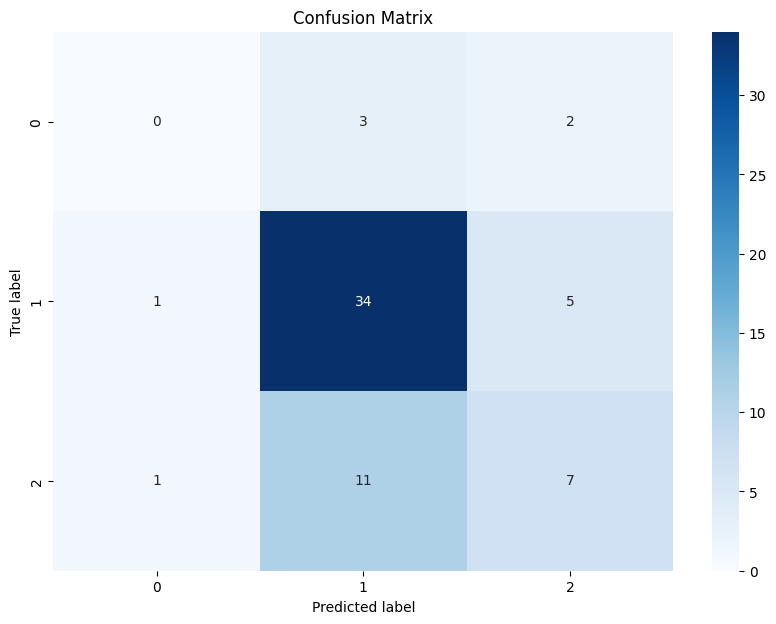

In [32]:
# Train a classifier
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

classifier = XGBClassifier(objective='multi:softprob', gamma=15)
classifier.fit(X_train_transform, y_train, sample_weight=sample_weights)

# Make predictions and evaluate
X_test_transform = rocket.transform(X_test)
predictions = classifier.predict(X_test_transform)
train_predctions = classifier.predict(X_train_transform)

# Evaluate classifier
from sklearn.metrics import accuracy_score
print(f"Accuracy on Training: {accuracy_score(y_train, train_predctions)}")
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions, target_names=['Low_RIFL', 'Medium_RIFL', 'High_RIFL']))

cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn for a more visually appealing matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Short Term Audio Features

In [33]:
data = np.load("X-y-short-term-audio.npz")
X = data['X']
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {label: weight for label, weight in zip(np.unique(y_train), class_weights)}

# Apply ROCKET transformation
rocket = Rocket()
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

smote = SMOTE(random_state=42)
x_sm, y_sm = smote.fit_resample(X_train_transform, y_train)

X_train_transform = np.concatenate((X_train_transform, x_sm), axis = 0)
y_train = np.concatenate((y_train, y_sm), axis=0)

Accuracy on Training: 0.9827288428324698
Accuracy: 0.609375
              precision    recall  f1-score   support

    Low_RIFL       0.25      0.20      0.22         5
 Medium_RIFL       0.67      0.82      0.74        40
   High_RIFL       0.45      0.26      0.33        19

    accuracy                           0.61        64
   macro avg       0.46      0.43      0.43        64
weighted avg       0.58      0.61      0.58        64



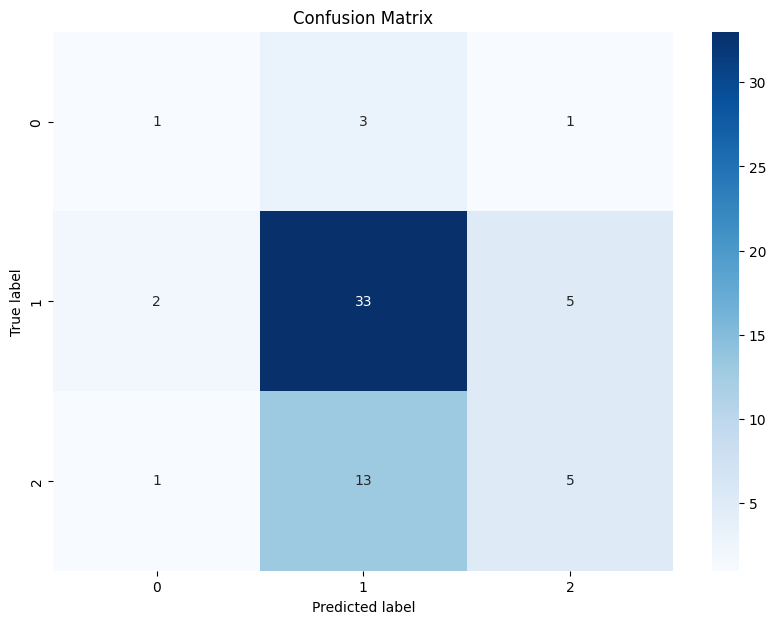

In [34]:
# Train a classifier
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

classifier = XGBClassifier(objective='multi:softprob', gamma=15)
classifier.fit(X_train_transform, y_train, sample_weight=sample_weights)

# Make predictions and evaluate
X_test_transform = rocket.transform(X_test)
predictions = classifier.predict(X_test_transform)
train_predctions = classifier.predict(X_train_transform)

# Evaluate classifier
from sklearn.metrics import accuracy_score
print(f"Accuracy on Training: {accuracy_score(y_train, train_predctions)}")
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions, target_names=['Low_RIFL', 'Medium_RIFL', 'High_RIFL']))

cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn for a more visually appealing matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Very Short Term Audio Features

In [35]:
data = np.load("X-y-very-short-term-audio.npz")
X = data['X']
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {label: weight for label, weight in zip(np.unique(y_train), class_weights)}

# Apply ROCKET transformation
rocket = Rocket()
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

smote = SMOTE(random_state=42)
x_sm, y_sm = smote.fit_resample(X_train_transform, y_train)

X_train_transform = np.concatenate((X_train_transform, x_sm), axis = 0)
y_train = np.concatenate((y_train, y_sm), axis=0)

Accuracy on Training: 0.9723661485319517
Accuracy: 0.546875
              precision    recall  f1-score   support

    Low_RIFL       0.00      0.00      0.00         5
 Medium_RIFL       0.63      0.72      0.67        40
   High_RIFL       0.43      0.32      0.36        19

    accuracy                           0.55        64
   macro avg       0.35      0.35      0.35        64
weighted avg       0.52      0.55      0.53        64



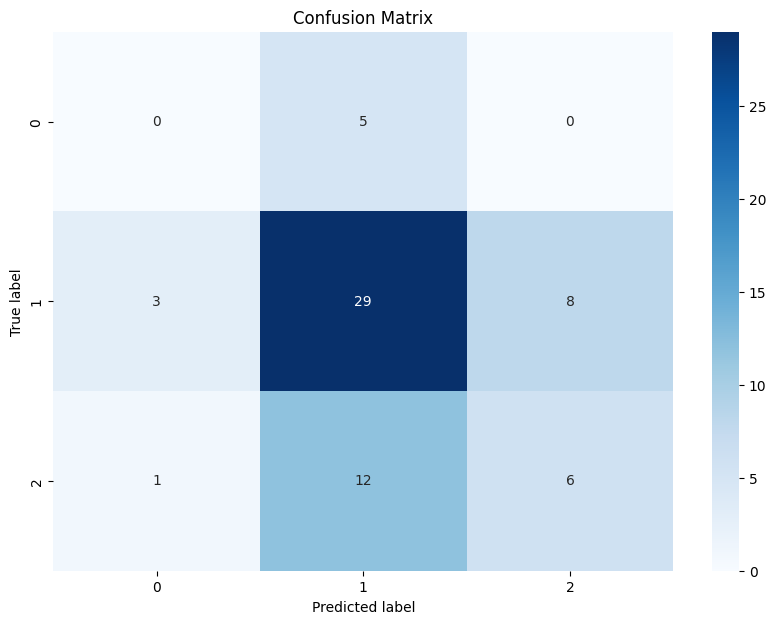

In [36]:
# Train a classifier
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

classifier = XGBClassifier(objective='multi:softprob', gamma=15)
classifier.fit(X_train_transform, y_train, sample_weight=sample_weights)

# Make predictions and evaluate
X_test_transform = rocket.transform(X_test)
predictions = classifier.predict(X_test_transform)
train_predctions = classifier.predict(X_train_transform)

# Evaluate classifier
from sklearn.metrics import accuracy_score
print(f"Accuracy on Training: {accuracy_score(y_train, train_predctions)}")
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions, target_names=['Low_RIFL', 'Medium_RIFL', 'High_RIFL']))

cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn for a more visually appealing matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()